<a href="https://colab.research.google.com/github/DevRichan/API-Authentication-with-JWT-NodeJS-MongoDB-/blob/master/Tips_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## load data_set
df = sns.load_dataset('tips')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


### Question 1 :
- Men and women who smoke
- Men and women who don't smoke

Notes : 
- I assume that the number of customers present is based on the number in the gender column

In [ ]:
male_yes = len(df[(df['sex'] == 'Male') & (df['smoker'] =='Yes')])
print('The number of men who smoke = ',male_yes)

The number of men who smoke =  60


In [ ]:
female_yes = len(df[(df['sex'] == 'Female') & (df['smoker'] =='Yes')])
print('The number of woman who smoke = ',female_yes)

The number of woman who smoke =  33


In [ ]:
male_no = len(df[(df['sex'] == 'Male') & (df['smoker'] == 'No')])
print('The number of men who dont smoke = ',male_no)

The number of men who dont smoke =  97


In [ ]:
female_no = len(df[(df['sex'] == 'Female') & (df['smoker'] == 'No')])
print('The number of Woman who dont smoke = ',female_no)

The number of Woman who dont smoke =  54


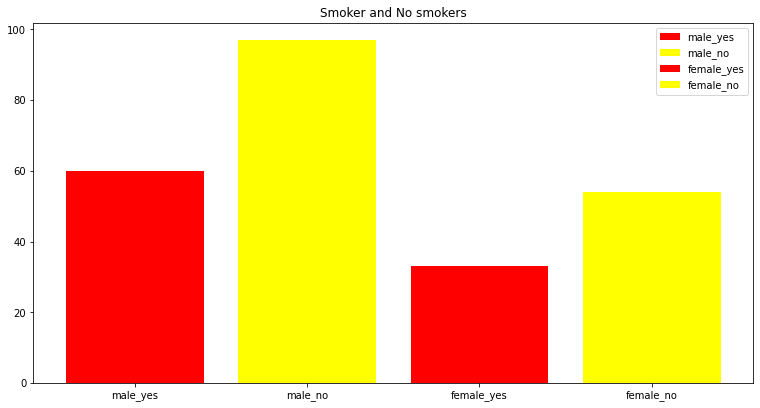

In [ ]:
data = {
    'male_yes' : male_yes,
    'male_no' : male_no,
    'female_yes': female_yes,
    'female_no': female_no
}

color = ['red','yellow','red','yellow']
labell = ['male_yes','male_no','female_yes','female_no']
names = list(data.keys())
values= list(data.values())
# print(names)
# print(values)

fig= plt.figure(figsize=(10,5))
axes = fig.add_axes([0,0,1,1])


for i in range (len(names)):
    axes.bar(
    names[i],values[i],color = color[i], label=labell[i]
    )
axes.set_title('Smoker and No smokers',color='black')
axes.legend()
plt.show()


### Question 1.2 :
- Men and women who smoke
- Men and women who don't smoke

Notes : 
- I assume that the number of customers present is based on the number in the gender column

In [ ]:
male_yes_2 = df[(df['sex'] == 'Male') & (df['smoker'] == 'Yes')]['size'].sum()
print('The number of men who smoke = ',male_yes_2)

The number of men who smoke =  150


In [ ]:
female_yes_2 = df[(df['sex'] == 'Female') & (df['smoker'] == 'Yes')]['size'].sum()
print('The number of women who smoke = ',female_yes_2)

The number of women who smoke =  74


In [ ]:
male_no = df[(df['sex'] == 'Male') & (df['smoker'] == 'No')]['size'].sum()
print('The number of men who dont smoke = ',male_no)

The number of men who dont smoke =  263


In [ ]:
female_no = df[(df['sex'] == 'Female') & (df['smoker'] == 'No')]['size'].sum()
print('The number of women who dont smoke = ',female_no)

The number of women who dont smoke =  140


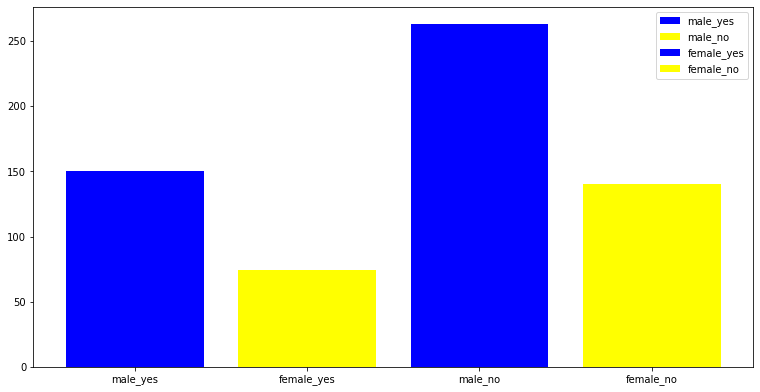

In [ ]:
### Visualization

data = {
    'male_yes' : male_yes_2,
    'female_yes': female_yes_2,
    'male_no' : male_no,
    'female_no': female_no
}

fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([0,0,1,1])

color = ['blue','yellow','blue','yellow']
labell = ['male_yes','male_no','female_yes','female_no']
names = list(data.keys())
values= list(data.values())

for i in range(len(names)):
    axes.bar(
    names[i],values[i],color=color[i],label=labell[i]
    )

plt.legend()



### Question 2 :
- Total tip of the men and woman who smoke

In [ ]:
tip_male = df[(df['sex'] == 'Male') & (df['smoker']=='Yes')]['tip'].sum()
print('A tip from average/mean man who smoke is = ',round(tip_male,2))

A tip from average/mean man who smoke is =  183.07


In [ ]:
tip_female = df[(df['sex'] == 'Female') & (df['smoker'] == 'Yes')]['tip'].sum()
print('A tip from average/mean man who smoke is =' ,round(tip_female,2))

A tip from average/mean man who smoke is = 96.74


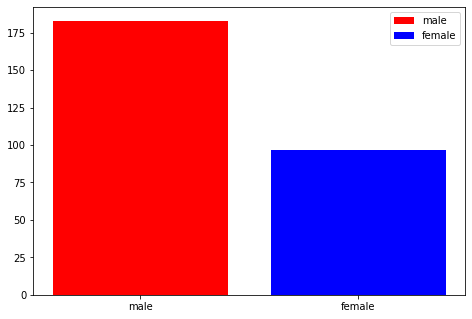

In [ ]:

dicty = {
    'male' : tip_male,
    'female' : tip_female
}

keys = list(dicty.keys())
values = list(dicty.values())
colorr = ['red','blue']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for i in range(len(keys)):
    ax.bar(
    keys[i],values[i],color=colorr[i],label = keys[i]
    )
plt.legend()
plt.show()

In [ ]:
# Other solution

sex = df['sex'].values
smoker = df['smoker'].values
tip = df['tip'].values
join = zip(sex,smoker,tip)

jml_male = 0
jml_female = 0
for s,t,j in join:
    if (s == 'Male') & (t=='Yes'):
        jml_male+=j
    elif (s == 'Female') & (t=='Yes'):
        jml_female+=j
        
print('A tip from average/mean man who smoke is = ',jml_male)
print('A tip from average/mean man who smoke is =' ,jml_female)

A tip from average/mean man who smoke is =  183.07
A tip from average/mean man who smoke is = 96.74


### Question 3 :
- The day with the most lunch
- The day with the most dinner

Notes : 
- I assume that this data is weekly, and the number of subscribers is calculated from the size column

In [ ]:
df['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [ ]:
df['time'].unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

In [ ]:
sunday_l = df[(df['day'] == 'Sun') & (df['time'] =='Lunch')]['size'].sum()
thursday_l = df[(df['day'] == 'Thur') & (df['time'] =='Lunch')]['size'].sum()
friday_l = df[(df['day'] == 'Fri') & (df['time'] =='Lunch')]['size'].sum()
sat_l = df[(df['day'] == 'Sat') & (df['time'] =='Lunch')]['size'].sum()

print('Amount of Lunch on Sunday = ', sunday_l)
print('Amount of Lunch on Thur = ', thursday_l)
print('Amount of Lunch on Fri = ', friday_l)
print('Amount of Lunch on Saturday = ', sat_l)

Amount of Lunch on Sunday =  0
Amount of Lunch on Thur =  150
Amount of Lunch on Fri =  14
Amount of Lunch on Saturday =  0


In [ ]:
sunday_dd = df[(df['day'] == 'Sun') & (df['time'] =='Dinner')]['size'].sum()
thursday_dd = df[(df['day'] == 'Thur') & (df['time'] =='Dinner')]['size'].sum()
friday_dd = df[(df['day'] == 'Fri') & (df['time'] =='Dinner')]['size'].sum()
sat_dd = df[(df['day'] == 'Sat') & (df['time'] =='Dinner')]['size'].sum()

print('Amount of Dinner on Sunday = ', sunday_dd)
print('Amount of Dinner on Thur = ', thursday_dd)
print('Amount of Dinner on Fri = ', friday_dd)
print('Amount of Dinner on Saturday = ', sat_dd)

Amount of Dinner on Sunday =  216
Amount of Dinner on Thur =  2
Amount of Dinner on Fri =  26
Amount of Dinner on Saturday =  219


14


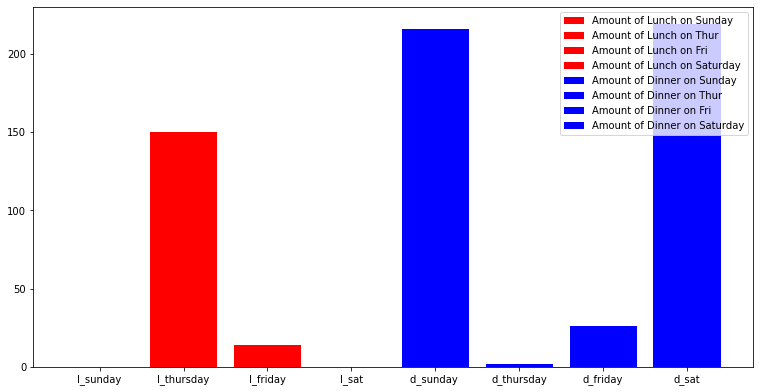

In [ ]:
dict_data2 = {
    'l_sunday' :sunday_l,
    'l_thursday': thursday_l,
    'l_friday' : friday_l,
    'l_sat' : sat_l,
    
    'd_sunday ': sunday_dd,
    'd_thursday' : thursday_dd,
    'd_friday' : friday_dd,
    'd_sat' : sat_dd
}
keys = list(dict_data2.keys())
values = list(dict_data2.values())
color = ['red','red','red','red','blue','blue','blue','blue']
label = ['Amount of Lunch on Sunday',
        'Amount of Lunch on Thur', 
        'Amount of Lunch on Fri',
        'Amount of Lunch on Saturday',
        'Amount of Dinner on Sunday', 
        'Amount of Dinner on Thur', 
        'Amount of Dinner on Fri', 
        'Amount of Dinner on Saturday'
        ]

print(values[2])
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
for i in range(len(keys)):
    ax.bar(
    keys[i],values[i],color=color[i],label=label[i]
    )
plt.legend()
plt.show()